# 2021 Parteien

In [6]:
import pandas as pd
import numpy as np
import cleandata as cd

In [7]:
df = pd.read_csv('../data/Gemeinde_Exekutive - daten.csv')

## Check Gemeinde without chair

In [8]:
df_t = df.fillna("")
df_t = pd.pivot_table(df_t, index='Gemeinde', columns='Funktion', values='Name', aggfunc='count')
df_t[pd.isna(df_t['chair'])]

Funktion,,chair,school
Gemeinde,,,


## Clean Data

In [9]:
df = cd.clean(df)

Jahrgänge nicht zugeordnet: 15
Partei nicht zugeordnet: 9
Keine Jahrgänge: 21


# Alles über Parteien

## Die grössten Parteien

In [25]:
def nicelify_party(party):
    if party == 'multiple': return "Keine Dominanz"
    if party in ['cvp', 'fdp', 'svp', 'evp', 'edu', 'bdp']: return party.upper()
    if party == 'parteilos': return 'parteilos'
    if party == 'verschiedene': return 'Andere Partei'
    if party == 'grüne': return 'Grüne'
    
    return party

In [33]:
grPartei = df.groupby('partei_c').agg({'Gemeinde': 'count'}).sort_values('Gemeinde', ascending=False).reset_index()

# Remove Vacant
grPartei = grPartei[grPartei.partei_c != 'vacant']

grPartei['Prozent'] = round(100 / df['Gemeinde'].count() * grPartei.Gemeinde, 1)

grPartei['partei_c'] = grPartei['partei_c'].apply(nicelify_party)

grPartei.rename(columns={'Gemeinde': 'Sitze', 'partei_c': 'Partei'}, inplace=True)

grPartei.to_csv('../export/partei.csv', index=False)

grPartei

,Partei,Sitze,Prozent
0,parteilos,364,35.7
1,FDP,220,21.5
2,SVP,202,19.8
3,sp,62,6.1
4,Andere Partei,57,5.6
5,CVP,44,4.3
6,glp,34,3.3
7,EVP,20,2.0
8,Grüne,10,1.0
9,BDP,4,0.4


<AxesSubplot:xlabel='Partei'>

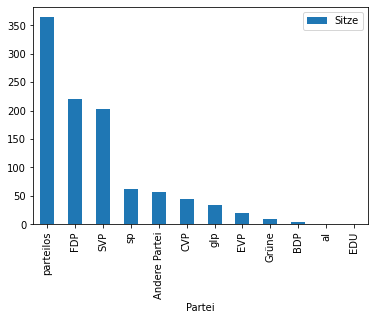

In [31]:
grPartei = grPartei.set_index('Partei')
grPartei.plot.bar(y = 'Sitze')

### In Prozent

In [13]:
grPartei

,Gemeinde,prozent
partei_c,,
parteilos,361,35.5
fdp,220,21.6
svp,203,20.0
sp,62,6.1
verschiedene,57,5.6
cvp,44,4.3
glp,34,3.3
evp,20,2.0
grüne,10,1.0


## Die parteilosesten Gemeinden

In [14]:
g = df.copy().groupby(['Gemeinde', 'partei_c']).agg({'Name': 'count'}).reset_index()
g = g.sort_values(['Gemeinde', 'Name'], ascending=[True, False])
g = g.drop_duplicates(['Gemeinde'])
g = g[g.partei_c == 'parteilos'].sort_values('Name', ascending=False)
g = g.rename(columns={'Name': 'Anzahl Parteilose'})
g.head(10)

,Gemeinde,partei_c,Anzahl Parteilose
361,Rifferswil,parteilos,7
309,Obfelden,parteilos,6
262,Mettmenstetten,parteilos,6
99,Dättlikon,parteilos,6
382,Schleinikon,parteilos,5
301,Oberglatt,parteilos,5
288,Niederweningen,parteilos,5
381,Schlatt (ZH),parteilos,5
120,Ellikon an der Thur,parteilos,5
392,Schöfflisdorf,parteilos,5


## Die politisch diversesten Gemeinden

In [15]:
g = df.groupby(['Gemeinde', 'partei_c']).count().reset_index()
g = g.groupby('Gemeinde').agg({'partei_c': 'count'})
g = g.sort_values('partei_c', ascending=False).reset_index()
g = g.rename(columns={'partei_c': 'anzahl parteien'})
g.head(10)

,Gemeinde,anzahl parteien
0,Opfikon,6
1,Wallisellen,6
2,Langnau am Albis,6
3,Urdorf,6
4,Schlieren,6
5,Horgen,6
6,Richterswil,6
7,Dietikon,6
8,Adliswil,6
9,Kloten,6


## Welche Partei stellt das Präsidium?

In [9]:
d = df[df.Funktion == 'chair'].groupby('partei_c').agg({'Gemeinde': 'count'}).sort_values('Gemeinde', ascending=False)
d['%'] = round(100 / d['Gemeinde'].sum() * d['Gemeinde'], 1)
d

,Gemeinde,%
partei_c,,
parteilos,54,33.3
fdp,44,27.2
svp,35,21.6
verschiedene,10,6.2
sp,7,4.3
cvp,5,3.1
evp,4,2.5
glp,3,1.9
